Dataset awal 'apachejit_train.csv' berhasil dimuat.

                 ANALISIS DATA SEBELUM PREPROCESSING

--- Lampiran 1: Statistik Deskriptif (SEBELUM) ---
                count  unique                                       top   freq               mean               std           min           25%           50%            75%           max  jumlah_nan
commit_id      106674  106674  e0792085cd24b42e5b4997ffef82b013fee2f63c      1                NaN               NaN           NaN           NaN           NaN            NaN           NaN           0
project        106674      15                              apache/camel  22700                NaN               NaN           NaN           NaN           NaN            NaN           NaN           0
buggy          106674       2                                     False  78435                NaN               NaN           NaN           NaN           NaN            NaN           NaN           0
fix            106674       2                 

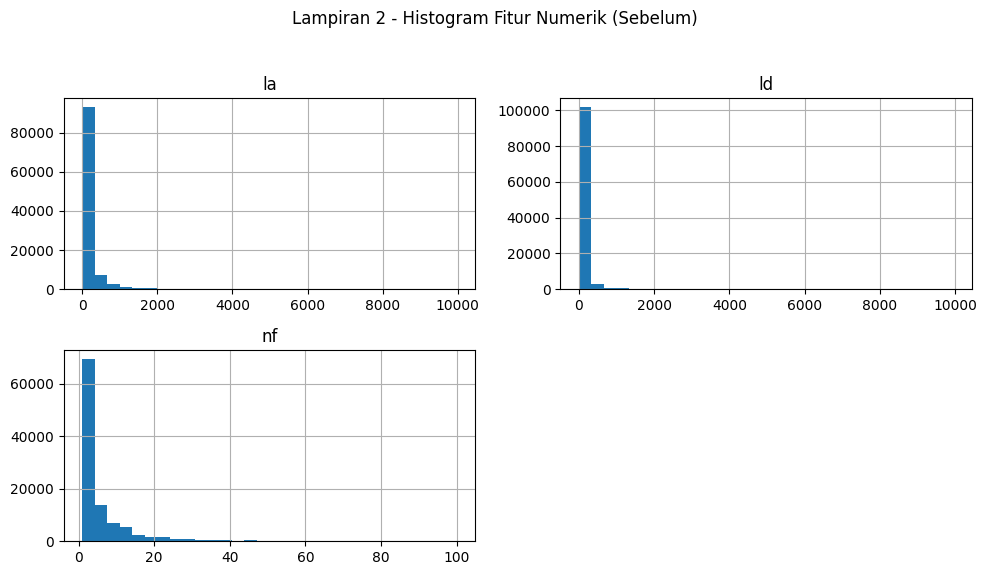

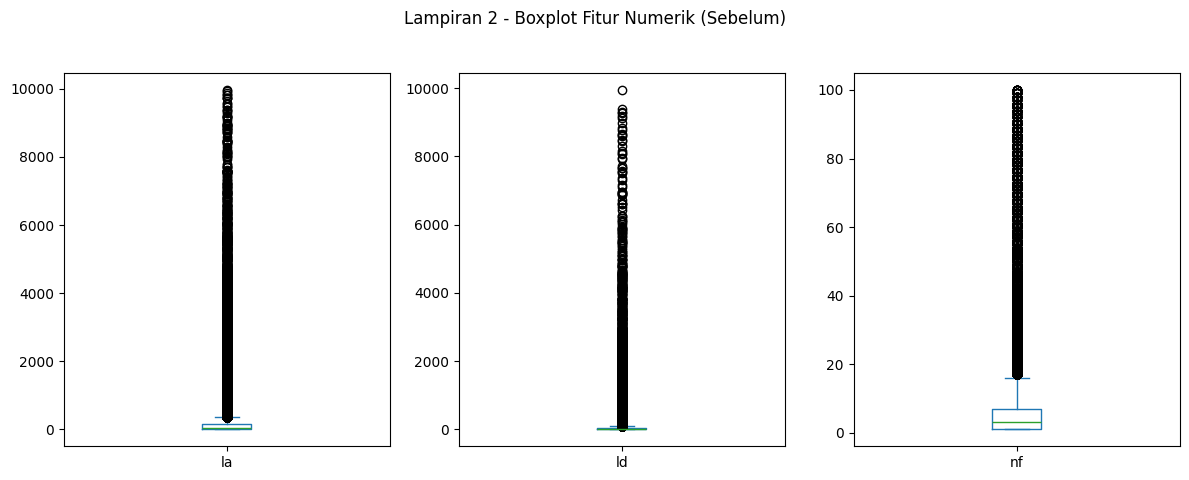

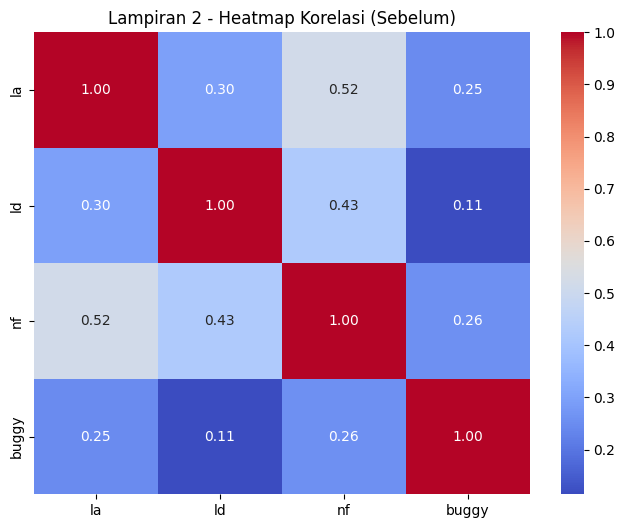


                 MEMULAI PROSES PREPROCESSING DATA
1. Pembersihan Data: Nilai NaN dihapus.
2. Pembuatan Fitur Baru: 'code_churn' telah ditambahkan.
3. Reduksi & Seleksi Data: Fitur dan target telah dipilih.
4. Transformasi Data: Fitur telah dinormalisasi.

                 ANALISIS DATA SESUDAH PREPROCESSING

--- Lampiran 1: Statistik Deskriptif (SESUDAH) ---
               count        mean         std  min   25%   50%    75%     max  jumlah_nan
la          106674.0  189.132347  533.157639  0.0   7.0  37.0  147.0  9967.0           0
ld          106674.0   76.731490  312.676802  0.0   2.0   9.0   41.0  9950.0           0
nf          106674.0    6.355813   10.141968  1.0   1.0   3.0    7.0   100.0           0
code_churn  106674.0  265.863837  693.152824  1.0  14.0  59.0  211.0  9998.0           0

--- Lampiran 3: Hasil Encoding dan Normalisasi ---

1. Hasil Encoding Variabel Target 'buggy'
(Menunjukkan data sudah dalam format biner 0 dan 1)
buggy
False    78435
True     28239


2. Hasi

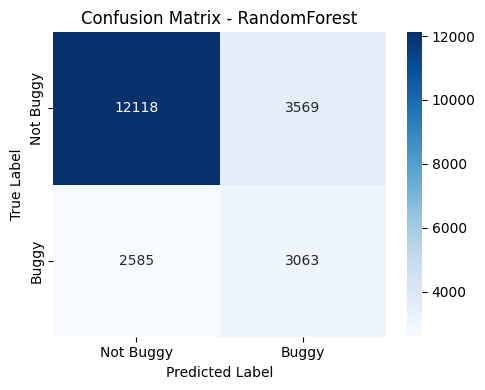

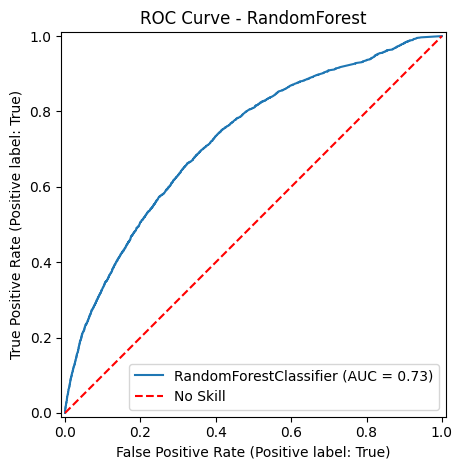

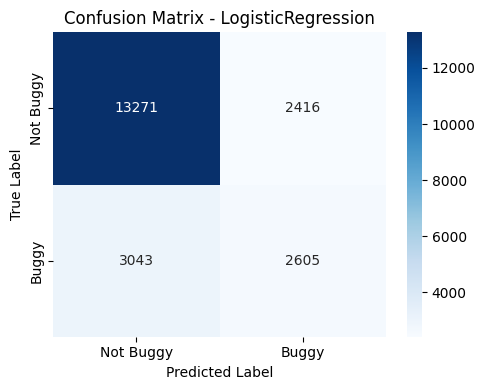

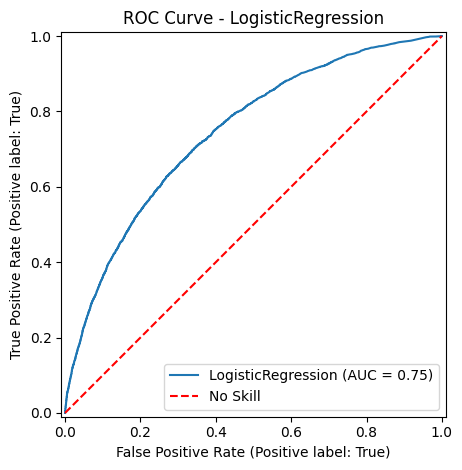


Random Forest classifier.
              precision    recall  f1-score   support

       False       0.82      0.77      0.80     15687
        True       0.46      0.54      0.50      5648

    accuracy                           0.71     21335
   macro avg       0.64      0.66      0.65     21335
weighted avg       0.73      0.71      0.72     21335

ROC AUC scroe: 0.7258237669866481

Logistic Regression classifier.
              precision    recall  f1-score   support

       False       0.81      0.85      0.83     15687
        True       0.52      0.46      0.49      5648

    accuracy                           0.74     21335
   macro avg       0.67      0.65      0.66     21335
weighted avg       0.74      0.74      0.74     21335

ROC AUC Score: 0.7451141406310525

 SEMUA ANALISIS DAN EVALUASI TELAH DITAMPILKAN.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import os

# ==============================================================================
#                        MEMUAT DATASET AWAL
# ==============================================================================
try:
    df_raw = pd.read_csv("apachejit_total.csv")
    print("Dataset awal 'apachejit_train.csv' berhasil dimuat.")
except FileNotFoundError:
    print("Error: File 'apachejit_train.csv' tidak ditemukan.")
    print("Pastikan file dataset berada di folder yang sama dengan skrip ini.")
    exit()

# ==============================================================================
#                 ANALISIS DATA SEBELUM PREPROCESSING
# ==============================================================================
print("\n" + "="*60)
print("                 ANALISIS DATA SEBELUM PREPROCESSING")
print("="*60)

# --- Lampiran 1: Statistik Deskriptif (SEBELUM) ---
print("\n--- Lampiran 1: Statistik Deskriptif (SEBELUM) ---")
stats_before = df_raw.describe(include='all').T
nan_before = df_raw.isnull().sum()
stats_before['jumlah_nan'] = nan_before
print(stats_before.to_string())


# --- Lampiran 2: Visualisasi Distribusi Data (SEBELUM) ---
print("\n--- Lampiran 2: Visualisasi (SEBELUM) ---")
print("--> Menampilkan plot. Tutup jendela plot untuk melanjutkan...")

# Histogram
df_raw[['la', 'ld', 'nf']].hist(bins=30, figsize=(10, 6))
plt.suptitle("Lampiran 2 - Histogram Fitur Numerik (Sebelum)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Boxplot
df_raw[['la', 'ld', 'nf']].plot(kind='box', subplots=True, layout=(1,3), figsize=(12,5), sharey=False)
plt.suptitle("Lampiran 2 - Boxplot Fitur Numerik (Sebelum)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df_raw[['la', 'ld', 'nf', 'buggy']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Lampiran 2 - Heatmap Korelasi (Sebelum)")
plt.show()


# --- Mengambil Data Awal untuk Perbandingan ---
initial_rows, initial_cols = df_raw.shape
initial_nans = df_raw.isnull().sum().sum()

# ==============================================================================
#                 PROSES PREPROCESSING (SESUAI LAPORAN ANDA)
# ==============================================================================
print("\n" + "="*60)
print("                 MEMULAI PROSES PREPROCESSING DATA")
print("="*60)

# 1. Pembersihan Data
df_processed = df_raw.dropna(subset=['la', 'ld', 'nf', 'buggy']).copy()
df_processed['author_date'] = pd.to_datetime(df_processed['author_date'], errors='coerce')
df_processed.dropna(subset=['author_date'], inplace=True)
print("1. Pembersihan Data: Nilai NaN dihapus.")

# 2. Pembuatan Fitur Baru
df_processed['code_churn'] = df_processed['la'] + df_processed['ld']
print("2. Pembuatan Fitur Baru: 'code_churn' telah ditambahkan.")

# 3. Reduksi & Seleksi Data
features = ['la', 'ld', 'nf', 'code_churn']
target = 'buggy'
X = df_processed[features]
y = df_processed[target]
print("3. Reduksi & Seleksi Data: Fitur dan target telah dipilih.")

# 4. Transformasi Data (Normalisasi)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print("4. Transformasi Data: Fitur telah dinormalisasi.")

# ==============================================================================
#                 ANALISIS DATA SESUDAH PREPROCESSING
# ==============================================================================
print("\n" + "="*60)
print("                 ANALISIS DATA SESUDAH PREPROCESSING")
print("="*60)

# --- Lampiran 1: Statistik Deskriptif (SESUDAH) ---
print("\n--- Lampiran 1: Statistik Deskriptif (SESUDAH) ---")
stats_after = df_processed[features + [target]].describe().T
nan_after = df_processed[features + [target]].isnull().sum()
stats_after['jumlah_nan'] = nan_after
print(stats_after.to_string())

# --- Lampiran 3: Hasil Encoding dan Normalisasi ---
print("\n--- Lampiran 3: Hasil Encoding dan Normalisasi ---")
print("\n1. Hasil Encoding Variabel Target 'buggy'")
print("(Menunjukkan data sudah dalam format biner 0 dan 1)")
print(y.value_counts().to_string())
print("\n\n2. Hasil Normalisasi Numerik (5 Baris Pertama)")
print("\nSEBELUM Normalisasi:")
print(X.head().to_string())
print("\n\nSESUDAH Normalisasi (StandardScaler):")
print(X_scaled_df.head().to_string())

# --- Lampiran 4: Tabel Perbandingan Data ---
print("\n--- Lampiran 4: Tabel Perbandingan Dataset ---")
final_rows, final_cols = df_processed.shape
final_nans = df_processed.isnull().sum().sum()
final_feature_cols = len(features)

comparison_data = {
    "Kriteria": ["Jumlah Baris", "Jumlah Kolom (Total)", "Jumlah Fitur (digunakan)", "Jumlah Nilai Kosong"],
    "Sebelum Preprocessing": [f"{initial_rows:,}", f"{initial_cols:,}", 3, f"{initial_nans:,}"],
    "Sesudah Preprocessing": [f"{final_rows:,}", f"{final_cols:,}", final_feature_cols, f"{final_nans:,}"]
}
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# --- Lampiran 6: Cuplikan Dataset Final ---
print("\n--- Lampiran 6: Cuplikan 10 Baris Pertama Dataset Final ---")
print(df_processed[features + [target]].head(10).to_string())


# ==============================================================================
#                 TRAINING MODEL DAN EVALUASI
# ==============================================================================
print("\n" + "="*60)
print("                 MEMULAI TRAINING MODEL DAN EVALUASI")
print("="*60)

# --- Lampiran 7: Evaluasi Awal ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Logistic Regression
lr = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n--- Lampiran 7: Laporan Evaluasi Model ---")
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Not Buggy (0)', 'Buggy (1)']))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.4f}")

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=['Not Buggy (0)', 'Buggy (1)']))
print(f"ROC AUC Score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]):.4f}")

print("\n--> Menampilkan visualisasi evaluasi. Tutup setiap plot untuk melanjutkan...")

# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Buggy', 'Buggy'], yticklabels=['Not Buggy', 'Buggy'])
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC Curve - Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve - RandomForest')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Buggy', 'Buggy'], yticklabels=['Not Buggy', 'Buggy'])
plt.title('Confusion Matrix - LogisticRegression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# ROC Curve - Logistic Regression
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title('ROC Curve - LogisticRegression')
plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.legend()
plt.tight_layout()
plt.show()

#clasifikasi report
print("\nRandom Forest classifier.")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC scroe:",roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

print("\nLogistic Regression classifier.")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("\n" + "="*60)
print(" SEMUA ANALISIS DAN EVALUASI TELAH DITAMPILKAN.")
print("="*60)

Mohon tunggu, sedang memproses semua data...
Proses data selesai. Menampilkan hasil teks...

     HASIL ANALISIS TEKS: SEBELUM & SESUDAH PREPROCESSING

--- Lampiran 1: Statistik Deskriptif (SEBELUM) ---
               count unique                                       top   freq               mean              std           min            25%           50%           75%           max  jumlah_nan
commit_id      44834  44834  9d17993fe4ca6963af12661db5d183748c734f9f      1                NaN              NaN           NaN            NaN           NaN           NaN           NaN           0
project        44834     15                              apache/camel   8299                NaN              NaN           NaN            NaN           NaN           NaN           NaN           0
buggy          44834      2                                      True  22421                NaN              NaN           NaN            NaN           NaN           NaN           NaN           0
fix          

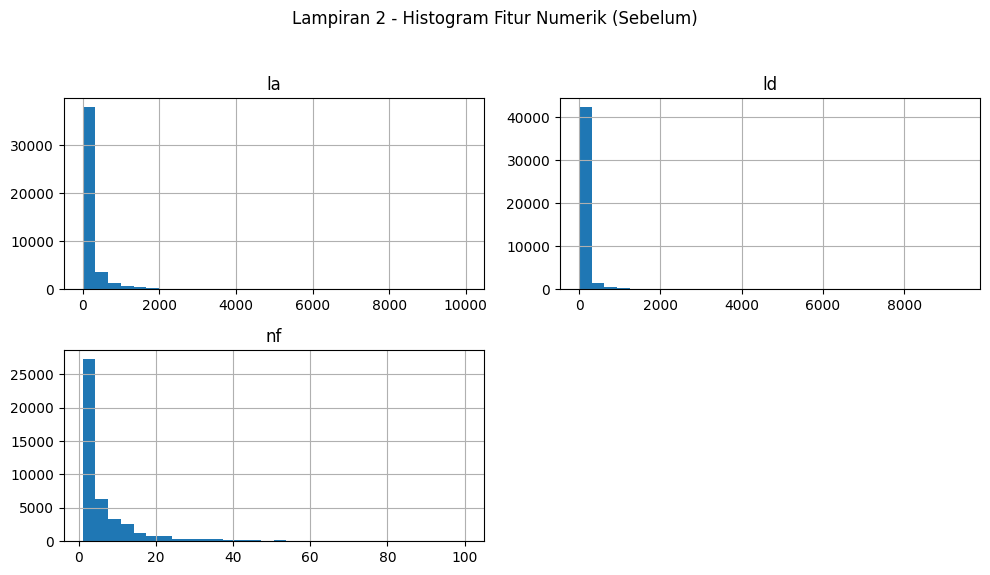

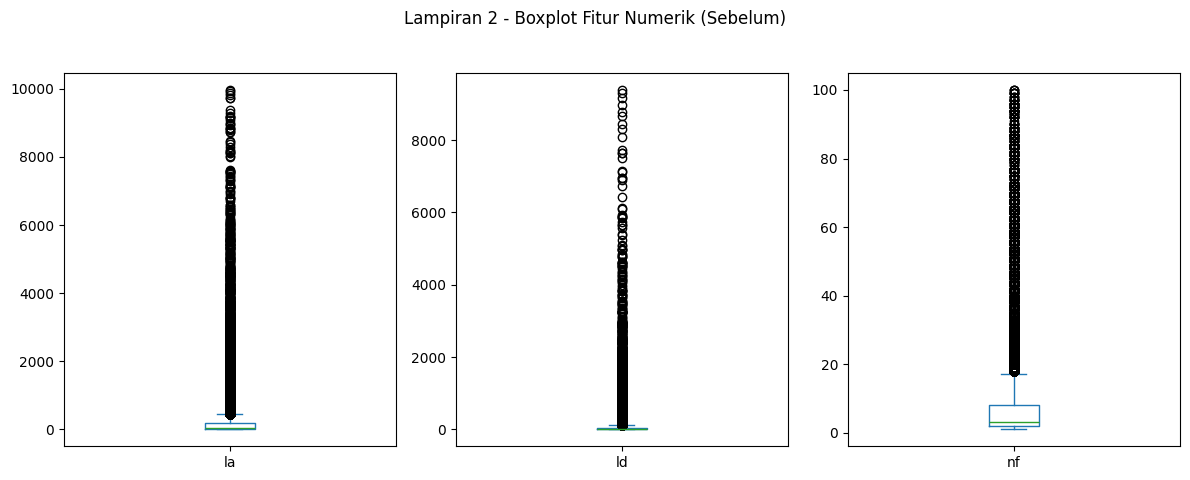

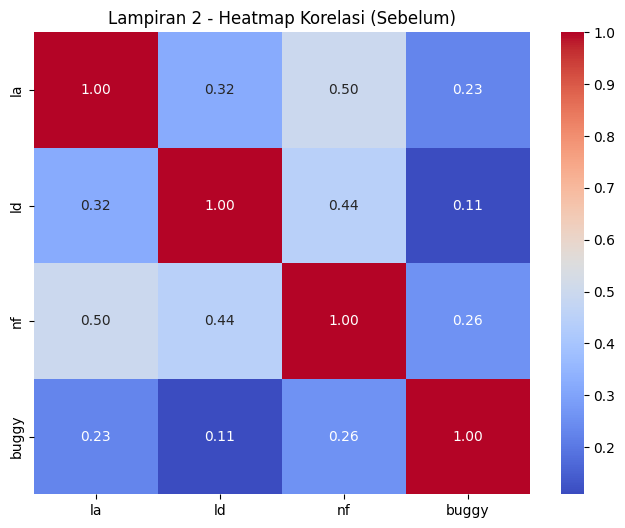


--> Menampilkan visualisasi SESUDAH preprocessing...


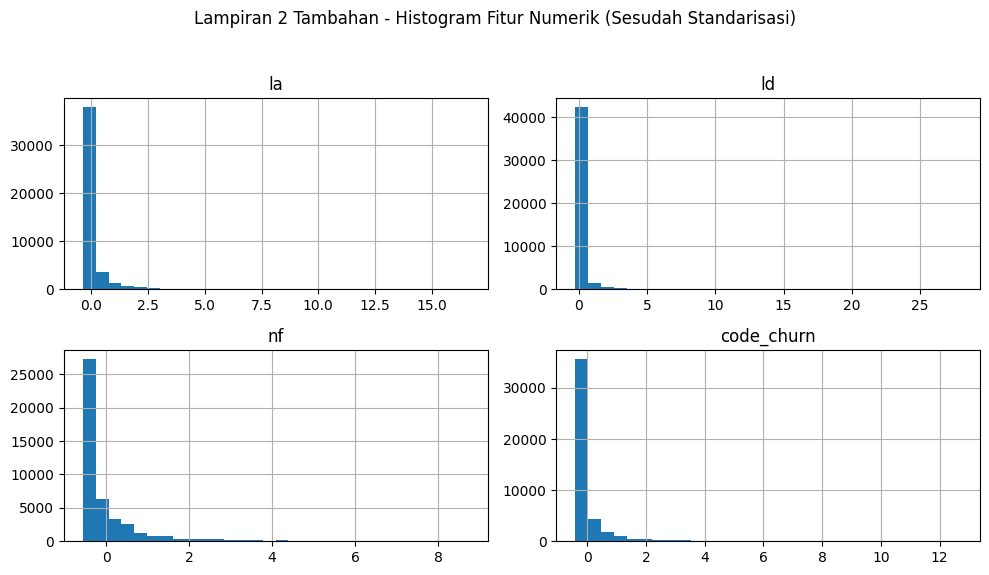

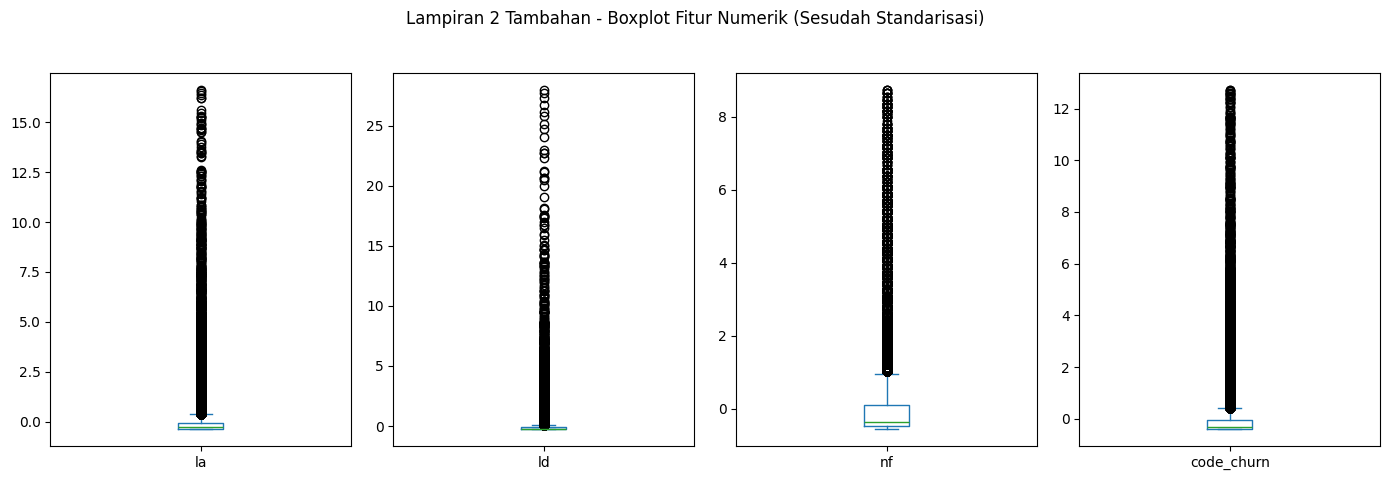

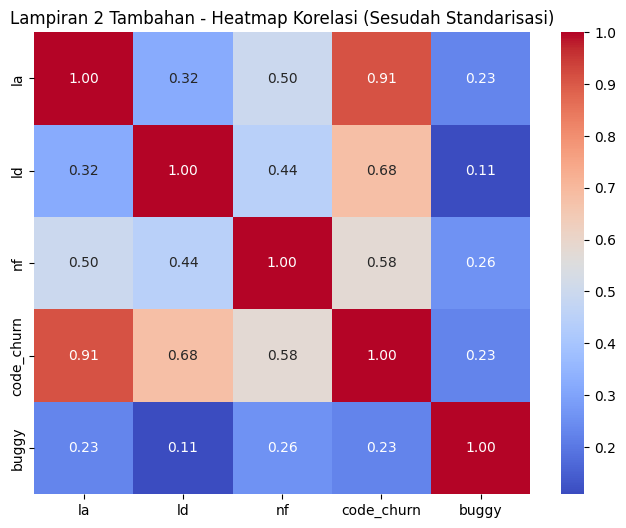

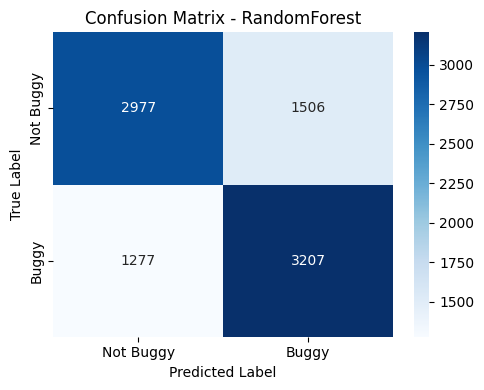

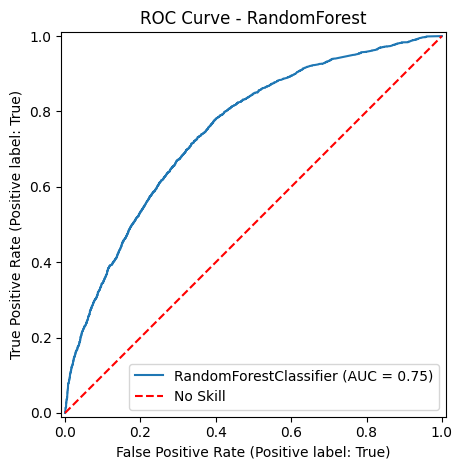

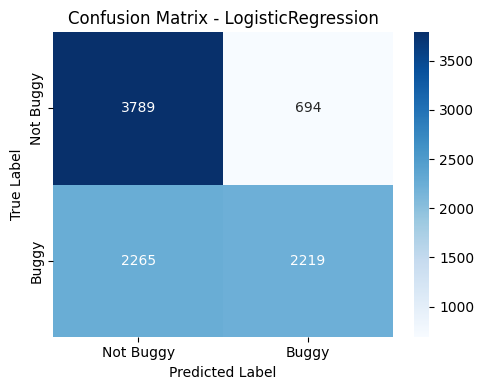

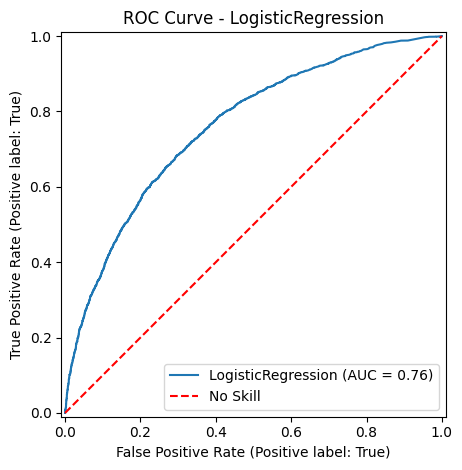


Random Forest classifier.
              precision    recall  f1-score   support

       False       0.70      0.66      0.68      4483
        True       0.68      0.72      0.70      4484

    accuracy                           0.69      8967
   macro avg       0.69      0.69      0.69      8967
weighted avg       0.69      0.69      0.69      8967

ROC AUC scroe: 0.7506190499026653

Logistic Regression classifier.
              precision    recall  f1-score   support

       False       0.63      0.85      0.72      4483
        True       0.76      0.49      0.60      4484

    accuracy                           0.67      8967
   macro avg       0.69      0.67      0.66      8967
weighted avg       0.69      0.67      0.66      8967

ROC AUC Score: 0.7594142695479782

                    PROSES SELESAI


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay
import os

# ==============================================================================
#                  LANGKAH 1: LAKUKAN SEMUA PROSES DATA
# ==============================================================================
print("Mohon tunggu, sedang memproses semua data...")

# Memuat Dataset Awal
try:
    df_raw = pd.read_csv("apachejit_train.csv")
except FileNotFoundError:
    print("Error: File 'apachejit_train.csv' tidak ditemukan.")
    exit()

# --- Mengambil data SEBELUM preprocessing ---
stats_before = df_raw.describe(include='all').T
stats_before['jumlah_nan'] = df_raw.isnull().sum()
initial_rows, initial_cols = df_raw.shape
initial_nans = df_raw.isnull().sum().sum()

# --- Proses Preprocessing ---
df_processed = df_raw.dropna(subset=['la', 'ld', 'nf', 'buggy']).copy()
df_processed['author_date'] = pd.to_datetime(df_processed['author_date'], errors='coerce')
df_processed.dropna(subset=['author_date'], inplace=True)
df_processed['code_churn'] = df_processed['la'] + df_processed['ld']

features = ['la', 'ld', 'nf', 'code_churn']
target = 'buggy'
X = df_processed[features]
y = df_processed[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# --- Mengambil data SESUDAH preprocessing ---
stats_after = df_processed[features + [target]].describe().T
stats_after['jumlah_nan'] = df_processed[features + [target]].isnull().sum()
final_rows, final_cols = df_processed.shape
final_nans = df_processed.isnull().sum().sum()

# --- Proses Training dan Evaluasi Model ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
# Logistic Regression
lr = LogisticRegression(C=0.1, solver='liblinear', class_weight='balanced')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Proses data selesai. Menampilkan hasil teks...")
# ==============================================================================
#                  LANGKAH 2: TAMPILKAN SEMUA HASIL TEKS
# ==============================================================================

print("\n" + "="*70)
print("     HASIL ANALISIS TEKS: SEBELUM & SESUDAH PREPROCESSING")
print("="*70)

# --- Lampiran 1: Statistik Deskriptif (SEBELUM vs SESUDAH) ---
print("\n--- Lampiran 1: Statistik Deskriptif (SEBELUM) ---")
print(stats_before.to_string())

print("\n\n--- Lampiran 1: Statistik Deskriptif (SESUDAH) ---")
print(stats_after.to_string())

# --- Lampiran 4: Tabel Perbandingan Data ---
print("\n\n--- Lampiran 4: Tabel Perbandingan Dataset ---")
comparison_data = {
    "Kriteria": ["Jumlah Baris", "Jumlah Kolom (Total)", "Jumlah Fitur (digunakan)", "Jumlah Nilai Kosong"],
    "Sebelum Preprocessing": [f"{initial_rows:,}", f"{initial_cols:,}", 3, f"{initial_nans:,}"],
    "Sesudah Preprocessing": [f"{final_rows:,}", f"{final_cols:,}", len(features), f"{final_nans:,}"]
}
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

# --- Lampiran 3: Hasil Encoding dan Normalisasi ---
print("\n\n--- Lampiran 3: Hasil Encoding dan Normalisasi ---")
print("\n1. Distribusi Variabel Target 'buggy' (Sudah Ter-encode)")
print(y.value_counts().to_string())
print("\n\n2. Perbandingan Normalisasi Fitur (5 Baris Pertama)")
print("\nSEBELUM Normalisasi:")
print(X.head().to_string())
print("\n\nSESUDAH Normalisasi (StandardScaler):")
print(X_scaled_df.head().to_string())

# --- Lampiran 6: Cuplikan Dataset Final ---
print("\n\n--- Lampiran 6: Cuplikan 10 Baris Pertama Dataset Final ---")
print(df_processed[features + [target]].head(10).to_string())

# --- Lampiran 7: Laporan Evaluasi Model ---
print("\n\n--- Lampiran 7: Laporan Evaluasi Model ---")
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Not Buggy (0)', 'Buggy (1)']))
print(f"ROC AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]):.4f}")

print("\n=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr, target_names=['Not Buggy (0)', 'Buggy (1)']))
print(f"ROC AUC Score: {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]):.4f}")

# ==============================================================================
#                  LANGKAH 3: TAMPILKAN SEMUA VISUALISASI
# ==============================================================================

print("\n" + "="*70)
print("                   MENAMPILKAN SEMUA VISUALISASI")
print("        (Tutup setiap jendela grafik untuk melanjutkan ke grafik berikutnya)")
print("="*70)

# --- Lampiran 2: Visualisasi (SEBELUM) ---
df_raw[['la', 'ld', 'nf']].hist(bins=30, figsize=(10, 6))
plt.suptitle("Lampiran 2 - Histogram Fitur Numerik (Sebelum)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

df_raw[['la', 'ld', 'nf']].plot(kind='box', subplots=True, layout=(1,3), figsize=(12,5), sharey=False)
plt.suptitle("Lampiran 2 - Boxplot Fitur Numerik (Sebelum)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df_raw[['la', 'ld', 'nf', 'buggy']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Lampiran 2 - Heatmap Korelasi (Sebelum)")
plt.show()

# ==============================================================================
#           TAMBAHAN: VISUALISASI DATA SESUDAH PREPROCESSING
# ==============================================================================
print("\n--> Menampilkan visualisasi SESUDAH preprocessing...")

# --- Histogram SESUDAH ---
X_scaled_df.hist(bins=30, figsize=(10, 6))
plt.suptitle("Lampiran 2 Tambahan - Histogram Fitur Numerik (Sesudah Standarisasi)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Boxplot SESUDAH ---
X_scaled_df.plot(kind='box', subplots=True, layout=(1,4), figsize=(14,5), sharey=False)
plt.suptitle("Lampiran 2 Tambahan - Boxplot Fitur Numerik (Sesudah Standarisasi)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- Heatmap Korelasi SESUDAH ---
# Kita tambahkan kembali target 'buggy' untuk melihat korelasi dengannya
data_after_corr = X_scaled_df.copy()
data_after_corr['buggy'] = y.values # Pastikan indexnya sesuai

plt.figure(figsize=(8, 6))
sns.heatmap(data_after_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Lampiran 2 Tambahan - Heatmap Korelasi (Sesudah Standarisasi)")
plt.show()
# --- Lampiran 7: Visualisasi Evaluasi ---
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Buggy', 'Buggy'], yticklabels=['Not Buggy', 'Buggy'])
plt.title('Confusion Matrix - RandomForest')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.tight_layout(); plt.show()

# ROC Curve - Random Forest
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve - RandomForest'); plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.legend(); plt.tight_layout(); plt.show()

# Confusion Matrix - Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Buggy', 'Buggy'], yticklabels=['Not Buggy', 'Buggy'])
plt.title('Confusion Matrix - LogisticRegression')
plt.xlabel('Predicted Label'); plt.ylabel('True Label')
plt.tight_layout(); plt.show()

# ROC Curve - Logistic Regression
RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title('ROC Curve - LogisticRegression'); plt.plot([0, 1], [0, 1], 'r--', label='No Skill')
plt.legend(); plt.tight_layout(); plt.show()


#clasifikasi report
print("\nRandom Forest classifier.")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC scroe:",roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

print("\nLogistic Regression classifier.")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("\n" + "="*70)
print("                    PROSES SELESAI")
print("="*70)

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# 1. Pembersihan Data
#    - Menghapus baris dengan nilai kosong pada kolom-kolom penting.
#    - Mengonversi 'author_date' ke format datetime dan menghapus jika ada error.
df_processed = df_raw.dropna(subset=['la', 'ld', 'nf', 'buggy']).copy()
df_processed['author_date'] = pd.to_datetime(df_processed['author_date'], errors='coerce')
df_processed.dropna(subset=['author_date'], inplace=True)
# 2. Pembuatan Fitur Baru
#    - Menambahkan fitur 'code_churn' dari penjumlahan 'la' dan 'ld'.
df_processed['code_churn'] = df_processed['la'] + df_processed['ld']
# 3. Reduksi & Seleksi Data
#    - Memilih hanya fitur-fitur yang akan digunakan untuk pemodelan.
features = ['la', 'ld', 'nf', 'code_churn']
target = 'buggy'
X = df_processed[features]
y = df_processed[target]
# 4. Transformasi Data (Normalisasi/Standarisasi)
#    - Menggunakan StandardScaler untuk mengubah skala fitur numerik.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

1. Membersihkan data...
2. Membuat fitur baru 'code_churn'...
3. Memilih fitur untuk model...
4. Melakukan normalisasi data...
Proses preprocessing selesai.


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106674 entries, 0 to 106673
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   commit_id    106674 non-null  object        
 1   project      106674 non-null  object        
 2   buggy        106674 non-null  bool          
 3   fix          106674 non-null  bool          
 4   year         106674 non-null  int64         
 5   author_date  106674 non-null  datetime64[ns]
 6   la           106674 non-null  int64         
 7   ld           106674 non-null  int64         
 8   nf           106674 non-null  int64         
 9   nd           106674 non-null  int64         
 10  ns           106674 non-null  int64         
 11  ent          106674 non-null  float64       
 12  ndev         106674 non-null  float64       
 13  age          106674 non-null  float64       
 14  nuc          106674 non-null  float64       
 15  aexp         106674 non-null  int6